In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [25]:
#import dataset
df=pd.read_csv("Social_Network_Ads.csv")

In [26]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
df=df[['Age','Purchased']]
df.columns=['Age','Purchased']

In [28]:
df

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0
...,...,...
395,46,1
396,51,1
397,50,1
398,36,0


In [29]:
#splitting the dataset
test = df.sample(50)
train=df[~df.isin(test)]
train.dropna(inplace=True)

In [30]:
test.shape

(50, 2)

In [31]:
train.shape

(350, 2)

In [32]:
#activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [33]:
#loss function
def square_loss(y_pred, target):
    return np.mean(pow((y_pred-target),2))

In [34]:
#splitting list into x and y
x_train, y_train = train.Age, train['Purchased']
x_test, y_test = test.Age, test['Purchased']

In [37]:
#model setup and running
lr=0.01  #standard
w=np.random.uniform(0,1)
b=0.1

for i in range(1000):
    z=np.dot(x_train, w)+b

y_pred=sigmoid(z)
l=square_loss(y_pred,y_train)
gradient_w=np.dot((y_pred-y_train).T,x_train)/x_train.shape[0]
gradient_b=np.mean(y_pred-y_train)

w=w-lr*gradient_w
b=b-lr*gradient_b

In [38]:
for i in range(len(x_test)):
    r=sigmoid(np.dot(x_test,w)+b)

In [39]:
r

array([0.99662115, 0.99987678, 0.99662115, 0.99957305, 0.99584664,
       0.99879808, 0.99935403, 0.99996444, 0.99902275, 0.99991857,
       0.99984842, 0.99584664, 0.98575106, 0.99852183, 0.99991857,
       0.99977062, 0.98575106, 0.99996444, 0.99999636, 0.99984842,
       0.9981822 , 0.99984842, 0.99984842, 0.99725162, 0.99935403,
       0.99971784, 0.99981353, 0.99971784, 0.99957305, 0.99999166,
       0.99981353, 0.99584664, 0.99981353, 0.99999636, 0.99977062,
       0.99996444, 0.99995626, 0.99776472, 0.99957305, 0.99998974,
       0.99993381, 0.97859312, 0.99984842, 0.99662115, 0.99995626,
       0.99957305, 0.99995626, 0.99971784, 0.99999449, 0.99996444])

In [40]:
y_test

39     0
360    1
60     0
253    1
129    0
182    1
142    0
291    1
41     0
392    1
310    0
150    0
12     0
179    0
20     1
122    0
149    0
201    0
370    1
380    0
196    0
377    0
296    1
97     1
213    0
110    0
124    0
81     0
162    0
243    1
326    0
172    0
244    0
393    1
269    0
216    0
19     1
94     0
111    0
206    1
299    1
165    0
332    0
100    0
323    1
351    0
389    1
290    1
379    1
26     1
Name: Purchased, dtype: int64

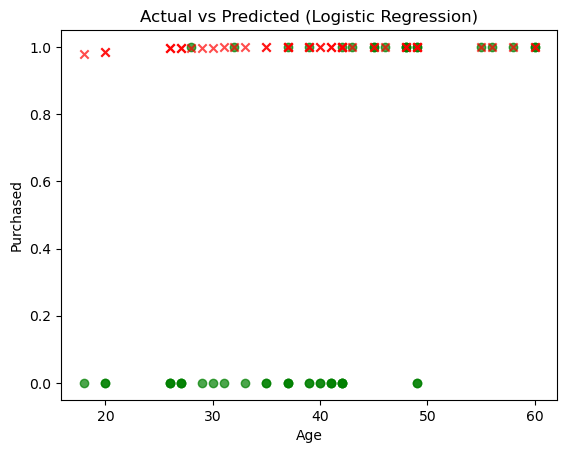

In [47]:
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title("Actual vs Predicted (Logistic Regression)")
plt.scatter(x_test,y_test, color='green', label='original',alpha=0.7)
plt.scatter(x_test, r,color='red',label='predicted',marker='x', alpha=0.7)
plt.show()

## To visualize
diff between actual values and predicted values 
of Logistic Regression
1. Confusion Matrix Plot
2. Predicted Probabilities vs. Actual Labels
3. Scatter Plot of Prediction Errors (for binary case)
4. ROC Curve